<a href="https://colab.research.google.com/github/p0mona/university_data_analysis_methods/blob/main/mad_lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
orders_path = 'https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_06/data/zamowienia.csv'
orders = pd.read_csv(orders_path, sep = ";")
orders.head()

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
0,Polska,Kowalski,2003-07-16,10248,440.00
1,Polska,Sowiński,2003-07-10,10249,1863.40
2,Niemcy,Peacock,2003-07-12,10250,1552.60
3,Niemcy,Leverling,2003-07-15,10251,654.06
4,Niemcy,Peacock,2003-07-11,10252,3597.90


In [43]:
people_path = '/content/ludnosc.xlsx'
people = pd.read_excel(people_path)
people.head()

,Kraj,2006,2007,2008,2009,2011,2012,2016,2017
0,Chińska Republika Ludowa,1.314480e+09,1.321290e+09,1.328020e+09,1.338613e+09,1.336718e+09,1.343240e+09,1.373541e+09,1.379303e+09
1,Indie,1.095352e+09,1.129866e+09,1.147996e+09,1.166079e+09,1.189173e+09,1.205074e+09,1.266884e+09,1.281936e+09
2,Unia Europejska,4.866422e+08,4.904261e+08,4.910187e+08,4.915829e+08,4.923873e+08,5.038244e+08,5.150528e+08,5.161954e+08
3,Stany Zjednoczone,2.984442e+08,3.011399e+08,3.055480e+08,3.072121e+08,3.132320e+08,3.138475e+08,3.239955e+08,3.266258e+08
4,Indonezja,2.454527e+08,2.346940e+08,2.375124e+08,2.402715e+08,2.456130e+08,2.482162e+08,2.583161e+08,2.605807e+08


In [44]:
names_path = '/content/imiona.xlsx'
names = pd.read_excel(names_path)
names.head()

,Rok,Imie,Liczba,Plec
0,2000,JAKUB,14497,M
1,2000,MATEUSZ,11454,M
2,2000,KACPER,8898,M
3,2000,MICHAŁ,8498,M
4,2000,PATRYK,7743,M


#Zadanie 1

Przygotuj i wyświetl wykres liniowy funkcji f(x) = 1/x dla x ϵ [1, 20]. Dodaj etykietę do linii wykresu i wyświetl legendę. Dodaj odpowiednie etykiety do osi wykresu (‘x’, ’f(x)’) oraz ustaw zakres dla obu osi na (0, 1) oraz (1, długość wektora x).

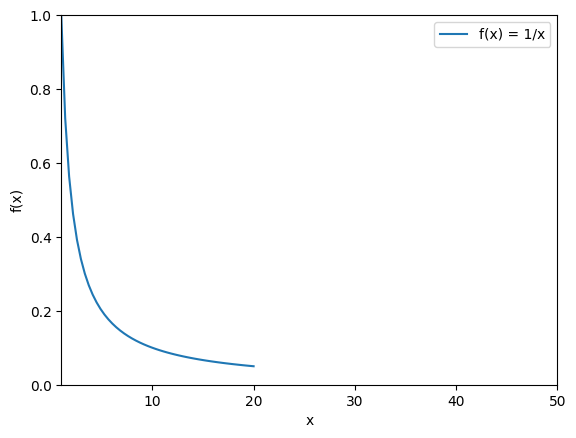

In [47]:
x = np.linspace(1, 20)
y = 1/x
plt.plot(x, y, label='f(x) = 1/x')
plt.xlim(1, len(x))
plt.ylim(0, 1)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend();

#Zadanie 2

Korzystając ze zbioru danych zamowienia.csv przygotuj i wyświetl dane w postaci wykresu liniowego z sumą zamówień dla każdego sprzedawcy z Polski w roku 2004 grupując po miesiącach (wzoruj się przykładzie z pkt. 3 tego labu). Każdy wykres to linia dla danego sprzedawcy, a oś x reprezentuje kolejne miesiące roku 2004. Pamiętaj o tym, że można iterować przez zgrupowaną ramkę danych pandas.

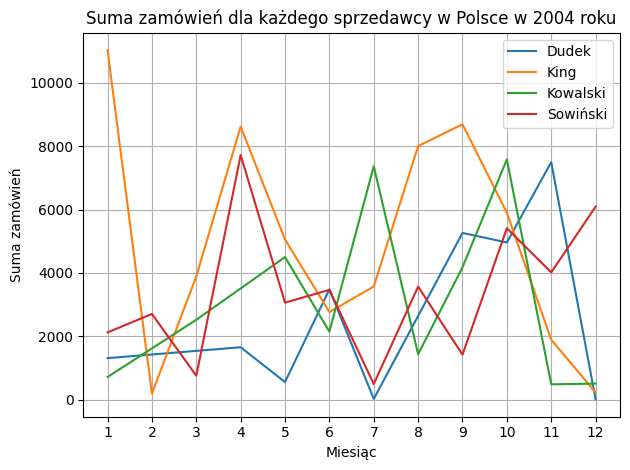

In [12]:
orders['Data zamowienia'] = pd.to_datetime(orders['Data zamowienia'])
orders['Rok'] = orders['Data zamowienia'].dt.year
orders['Miesiac'] = orders['Data zamowienia'].dt.month
orders_2004_pl = orders[(orders['Kraj'] == 'Polska') & (orders['Rok'] == 2004)]
grouped = orders_2004_pl.groupby(['Sprzedawca', 'Miesiac'])['Utarg'].sum().reset_index()

for sprzedawca in grouped['Sprzedawca'].unique():
    dane = grouped[grouped['Sprzedawca'] == sprzedawca]
    plt.plot(dane['Miesiac'], dane['Utarg'], label=sprzedawca)

plt.xlabel('Miesiąc')
plt.ylabel('Suma zamówień')
plt.title('Suma zamówień dla każdego sprzedawcy w Polsce w 2004 roku')
plt.legend()
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout();

#Zadanie 3

Korzystając z biblioteki pandas wczytaj zbiór danych z narodzinami dzieci przygotuj poniższe wykresy:

3.1 - wykres słupkowy przedstawiający ilość narodzonych dziewczynek i chłopców w całym okresie.

3.2 - wykres liniowy, gdzie będą dwie linie, jedna dla ilości urodzonych kobiet, druga dla mężczyzn dla każdego roku z osobna. Czyli y to ilość narodzonych kobiet lub mężczyzn (dwie linie), x to rok.

3.3 - wykres słupkowy przedstawiający sumę urodzonych dzieci w każdym roku.

Dodaj do wykresów stosowne etykiety. Poustawiaj różne kolory dla wykresów.

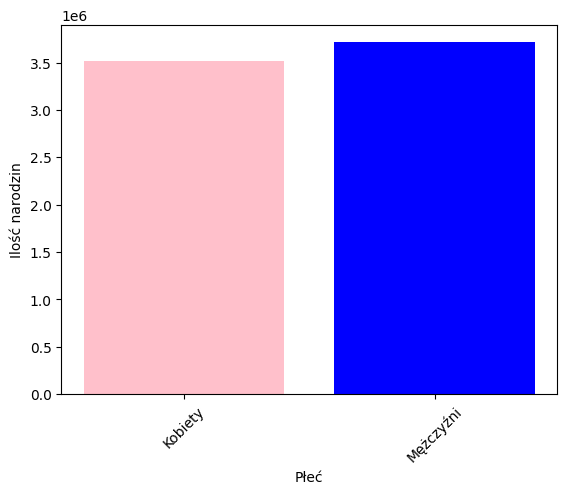

In [16]:
#3.1
suma = names.groupby('Plec')['Liczba'].sum()

plt.bar(['Kobiety', 'Mężczyźni'], suma, color=['pink', 'blue'])
plt.xticks(rotation=45)
plt.ylabel('Ilość narodzin')
plt.xlabel('Płeć');

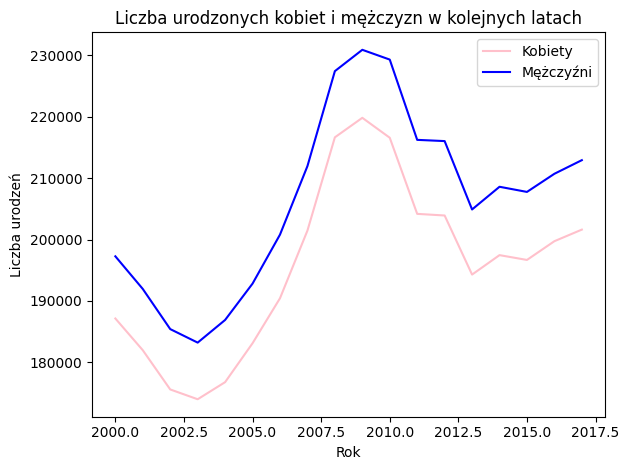

In [19]:
#3.2
grouped = names.groupby(['Rok', 'Plec'])['Liczba'].sum().unstack()

plt.plot(grouped.index, grouped['K'], label='Kobiety', color='pink')
plt.plot(grouped.index, grouped['M'], label='Mężczyźni', color='blue')
plt.xlabel('Rok')
plt.ylabel('Liczba urodzeń')
plt.title('Liczba urodzonych kobiet i mężczyzn w kolejnych latach')
plt.legend()
plt.tight_layout();

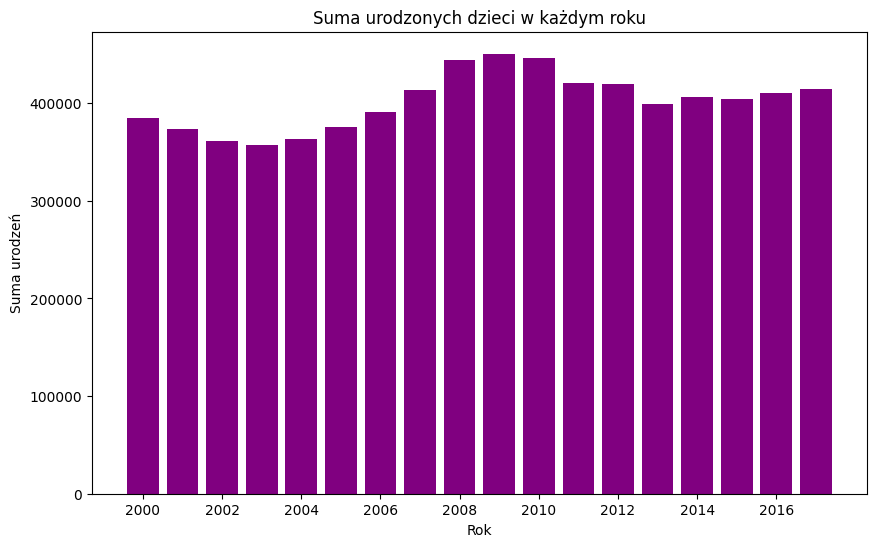

In [21]:
#3.3
suma = names.groupby('Rok')['Liczba'].sum()

plt.figure(figsize=(10, 6))
plt.bar(suma.index, suma, color='purple')
plt.xticks(ticks=suma.index[::2], labels=suma.index[::2])
plt.xlabel('Rok')
plt.ylabel('Suma urodzeń')
plt.title('Suma urodzonych dzieci w każdym roku');

#Zadanie 4

Korzystając ze zbioru danych Iris (https://archive.ics.uci.edu/ml/datasets/iris) wygeneruj wykres punktowy, gdzie wektor x to wartość sepal length a y to sepal width, dodaj paletę kolorów c na przykładzie listingu 7, a parametr s niech będzie wartością bezwzględną z różnicy wartości poszczególnych elementów wektorów x oraz y. Wykorzystaj bibliotekę pandas do przechowania datasetu.

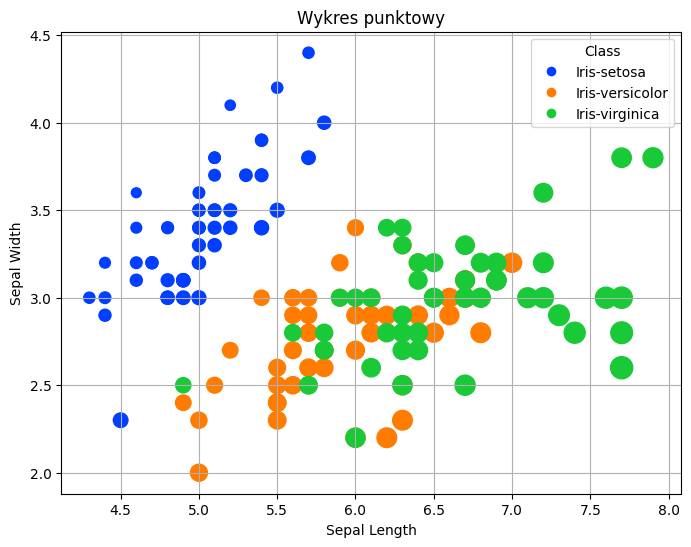

In [60]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, header=None, names=columns)
x = iris['sepal_length']
y = iris['sepal_width']
s = abs(x - y) * 50
classes = iris['class'].astype('category').cat.codes
palette = sns.color_palette("bright", n_colors=3)
colors = [palette[i] for i in classes]

plt.figure(figsize=(8,6))
plt.scatter(x=x, y=y, c=colors, s=s)

handles = [plt.Line2D([0], [0], marker='o', color='w', label=cat,
                      markerfacecolor=palette[i], markersize=8)
           for i, cat in enumerate(iris['class'].astype('category').cat.categories)]

plt.legend(handles=handles, title='Class')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Wykres punktowy')
plt.grid(True);

#Zadanie 5

Korzystając z pliku zamowienia.csv, policz sumy zamówień dla każdego sprzedawcy i wyświetl wykres kołowy z procentowym udziałem każdego sprzedawcy w ogólnej sumie zamówień. Poszukaj w Internecie jak dodać cień do takiego wykresu i jak działa atrybut explode tego wykresu. Wyświetl wykres podstawowy, z cieniem oraz z jednym elementem z aktywnym atrybutem explode.

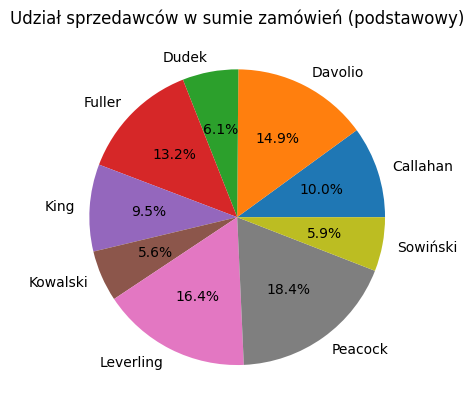

In [29]:
suma = orders.groupby('Sprzedawca')['Utarg'].sum()
plt.pie(suma, labels=suma.index, autopct='%1.1f%%')
plt.title('Udział sprzedawców w sumie zamówień (podstawowy)');

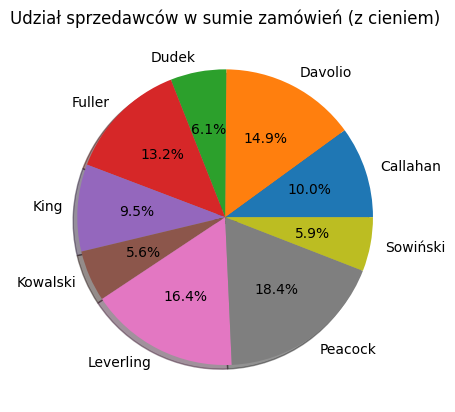

In [31]:
plt.pie(suma, labels=suma.index, autopct='%1.1f%%', shadow=True)
plt.title('Udział sprzedawców w sumie zamówień (z cieniem)');

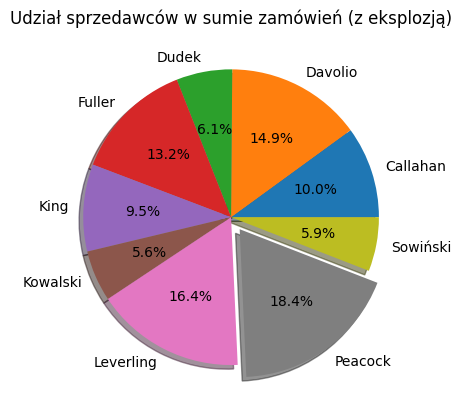

In [32]:
max_idx = suma.idxmax()
explode = [0.1 if label == max_idx else 0 for label in suma.index]
plt.pie(suma, labels=suma.index, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title('Udział sprzedawców w sumie zamówień (z eksplozją)');

#Zadanie 6

Korzystając z galerii matplotlib i przykładu postaraj się umieścić analogicznie 10 najbardziej ludnych krajów na świecie w roku 2017 korzystając z danych w pliku ludność.

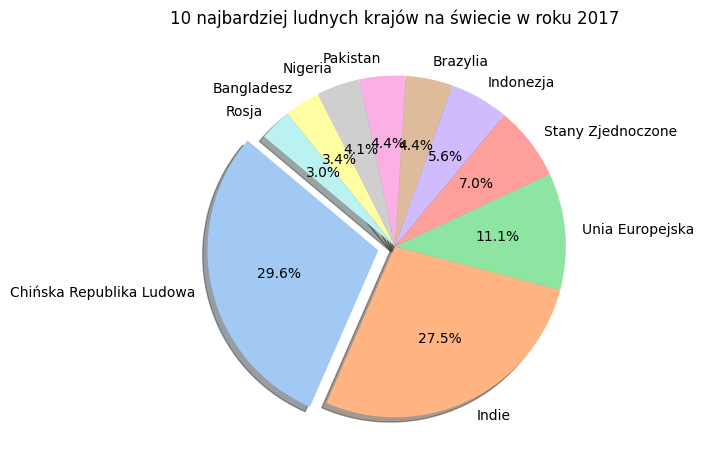

In [39]:
top10 = people.sort_values(by=2017, ascending=False).head(10)
max_idx = top10[2017].idxmax()
explode = [0.1 if label == max_idx else 0 for label in top10.index]
plt.pie(
    top10[2017],
    labels=top10['Kraj'],
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    explode=explode,
    colors=sns.color_palette('pastel')
)
plt.title('10 najbardziej ludnych krajów na świecie w roku 2017')
plt.tight_layout();